In [1]:
# Enable auto-reload for development
%load_ext autoreload
%autoreload 2

import sys

# Find the 'programming' folder in current path
from pathlib import Path

# Start with current working directory
current_path = Path.cwd()
print(f"Current working directory: {current_path}")

programming_root = next(
    (
        parent
        for parent in [current_path] + list(current_path.parents)
        if parent.name.lower() == 'programming'
    ),
    None,
)
if programming_root:
    print(f"✓ Found programming root: {programming_root}")
else:
    print("⚠ 'programming' folder not found in path")
    print(f"Path checked: {current_path}")

# Show the structure
if programming_root:
    print(f"\nRelative to programming root:")
else:
    # stop here if not found
    print("Cannot display structure without 'programming' root.")
    exit(1)

package_list = ("home-media-ai", "hydra-image-processor")
for package in package_list:
    package_path = programming_root / package / "src" / "python"
    if package_path.exists():
        sys.path.insert(0, str(package_path))
        print(f"Added {package} to sys.path: {package_path}")
    else:
        print(f" - {package} (not found)")

# Database
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Image processing
import rawpy
import numpy as np
from skimage.transform import rescale

# Add project to path
package_root = Path().resolve().parent
if str(package_root) not in sys.path:
    sys.path.insert(0, str(package_root))

sys.path.insert(0, str(Path.cwd().parent))

import hydra_image_processor as Hydra

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline


Current working directory: e:\programming\home-media-ai\src\python\notebooks
✓ Found programming root: e:\programming

Relative to programming root:
Added home-media-ai to sys.path: e:\programming\home-media-ai\src\python
Added hydra-image-processor to sys.path: e:\programming\hydra-image-processor\src\python


In [ ]:
from home_media_ai import MediaQuery, read_image_as_array

query = MediaQuery()
media = query.canon().rating_min(5).all()
print(f"Found {len(media)} high-rated Canon images.")


Found 96 high-rated Canon images.


In [ ]:
# Calculate figure size based on image aspect ratio
# Set maximum width in inches (adjust this for your notebook/display)
MAX_WIDTH = 18  # inches - works well for most notebooks

def get_figsize(image, max_width=MAX_WIDTH):
    """Calculate figure size to maintain aspect ratio.
    
    Args:
        image: numpy array with shape (height, width, channels) or (height, width)
        max_width: maximum width in inches
    
    Returns:
        tuple: (width, height) in inches
    """
    h, w = image.shape[:2]
    aspect_ratio = w / h
    
    # Calculate height to maintain aspect ratio
    width = max_width
    height = max_width / aspect_ratio
    
    return (width, height)


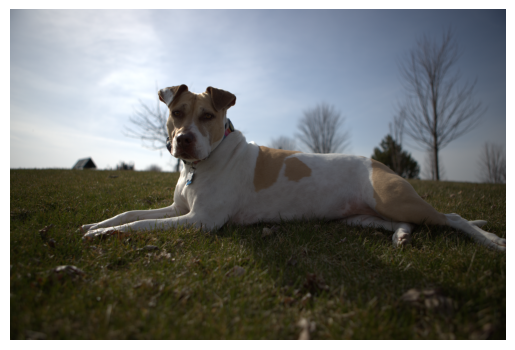

In [ ]:
im = media[2].read_as_array()
im = im.astype(np.float32) / 65535.0
plt.imshow(im)
plt.axis('off')
plt.show()


In [35]:
sigma = 1.0
imL = Hydra.LoG(im, [sigma,sigma,0])
print(f"LoG min: {imL.min()}, max: {imL.max()}")


LoG min: -0.2671876549720764, max: 0.2547750473022461


Size of image: (4180, 6264, 3), LoG shape: (4180, 6264, 3), Bright mask shape: (4180, 6264, 3), Dark mask shape: (4180, 6264, 3), dtype: bool
Bright regions: 6448571, Dark regions: 6767593
Original image shape: (4180, 6264, 3), figsize: 18.0x12.0 inches


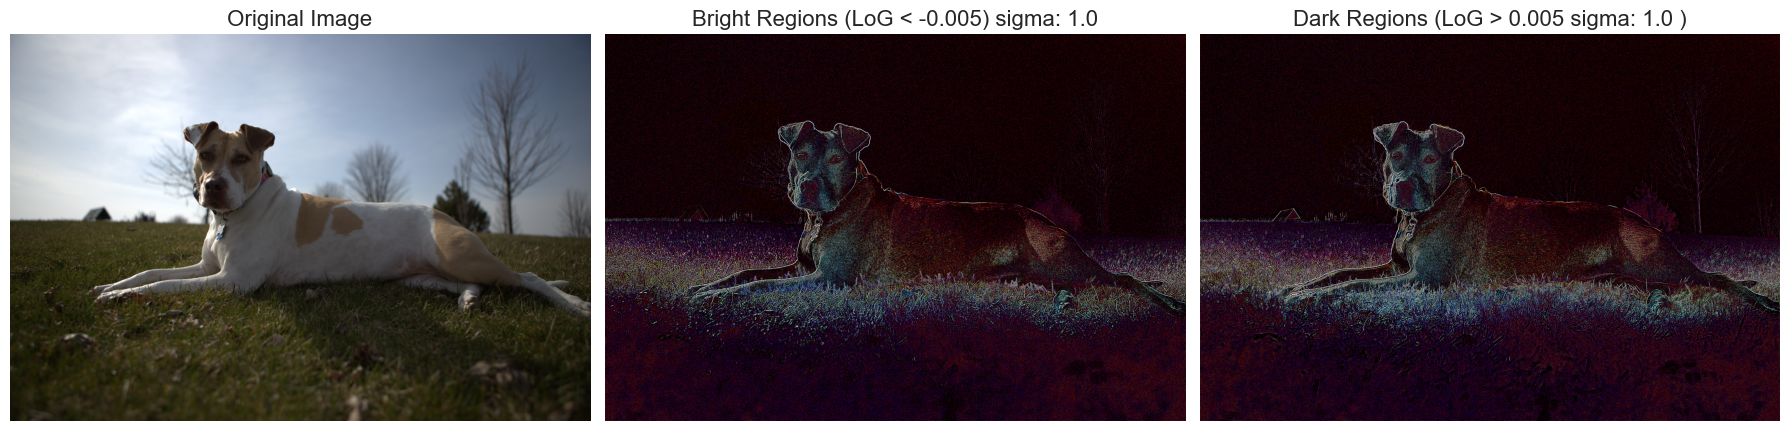

In [36]:
threshold = 5e-3
imBright = imL < -threshold
imDark = imL > threshold

print(f"Size of image: {im.shape}, LoG shape: {imL.shape}, Bright mask shape: {imBright.shape}, Dark mask shape: {imDark.shape}, dtype: {imBright.dtype}")

print(f"Bright regions: {np.sum(imBright)}, Dark regions: {np.sum(imDark)}")
# make these masks into rgb images for visualization
# convert true to 255 and false to 0
imBright = imBright.astype(np.uint8) * 255
imDark = imDark.astype(np.uint8) * 255

# Figure 1: Original Image
figsize = get_figsize(im)
print(f"Original image shape: {im.shape}, figsize: {figsize[0]:.1f}x{figsize[1]:.1f} inches")

plt.figure(figsize=figsize)
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image', fontsize=16)
plt.tight_layout()
# plt.show()

# Figure 2: Bright Regions

plt.subplot(1,3,2)
plt.imshow(imBright)
plt.axis('off')
plt.title(f"Bright Regions (LoG < -{threshold}) sigma: {sigma}", fontsize=16)
plt.tight_layout()
# plt.show()

# Figure 3: Dark Regions
plt.subplot(1,3,3)
# figsize = get_figsize(imDark)
# plt.figure(figsize=figsize)
plt.imshow(imDark)
plt.axis('off')
plt.title(f"Dark Regions (LoG > {threshold} sigma: {sigma} )", fontsize=16)
plt.tight_layout()
plt.show()
